##Analyzing Delhi's AQI, pollutants, and trends to inform air quality strategies.

#Problem Statement
Delhi faces severe air pollution, with dangerously high AQI levels due to vehicular emissions, industrial activities, and seasonal factors like crop burning. This study analyzes AQI trends, key pollutants (PM2.5, PM10, NO₂, CO, SO₂, O₃), seasonal variations, and geographical impacts using statistical methods and visualizations. By identifying pollution patterns and forecasting AQI levels, the research aims to support targeted strategies for improving air quality and public health.

##Dataset Description
This dataset contains air quality measurements for Delhi, tracking key pollutants over time. The columns represent various air pollutants that contribute to the Air Quality Index (AQI) and help in understanding pollution patterns, seasonal variations, and geographical impact. Below is a brief description of each column:

#1. Importing the library files

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import numpy as np

# 2. Reading the Dataset

In [ ]:
data = pd.read_csv("/content/delhiaqi.csv")

In [ ]:
data

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19
...,...,...,...,...,...,...,...,...,...
556,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
557,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
558,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54
559,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47


1.  **Date:** The recorded date of air quality measurements.
2.  **CO** (Carbon Monoxide): A colorless, odorless gas primarily emitted from vehicles and industrial processes. High levels can be harmful to human health.
3.  **NO** (Nitric Oxide): Produced from combustion processes, particularly from vehicle engines, contributing to smog and acid rain.
4.  **NO₂** (Nitrogen Dioxide): A major pollutant from vehicular and industrial emissions, responsible for respiratory issues and environmental damage.
5.  **O₃ (Ozone):** A secondary pollutant formed by chemical reactions in sunlight, contributing to smog and respiratory problems.
6.  **SO₂** (Sulfur Dioxide): Emitted from industrial processes and burning fossil fuels, leading to acid rain and respiratory issues.
7.  **PM2.5** (Particulate Matter ≤2.5µm): Fine particles that penetrate deep into the lungs, causing severe health risks. One of the most critical pollutants in Delhi.
8.  **PM10** (Particulate Matter ≤10µm): Larger particles causing respiratory irritation, commonly from dust, smoke, and industrial emissions.
9.  **NH₃** (Ammonia): Released from agricultural activities, waste management, and industrial processes, contributing to air pollution and secondary particle formation.

#First 5 rows of the dataset

In [ ]:
data.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19


#Last 5 rows of the dataset

In [ ]:
data.tail()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
556,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
557,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
558,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54
559,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47
560,2023-01-24 08:00:00,1134.87,8.61,56.89,80.11,110.63,123.76,140.26,5.51


#Thorough exploration of the dataset
Vewing the Columns in the dataset

In [ ]:
col = data.columns
print(col)

Index(['date', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3'], dtype='object')


#List of categorical features

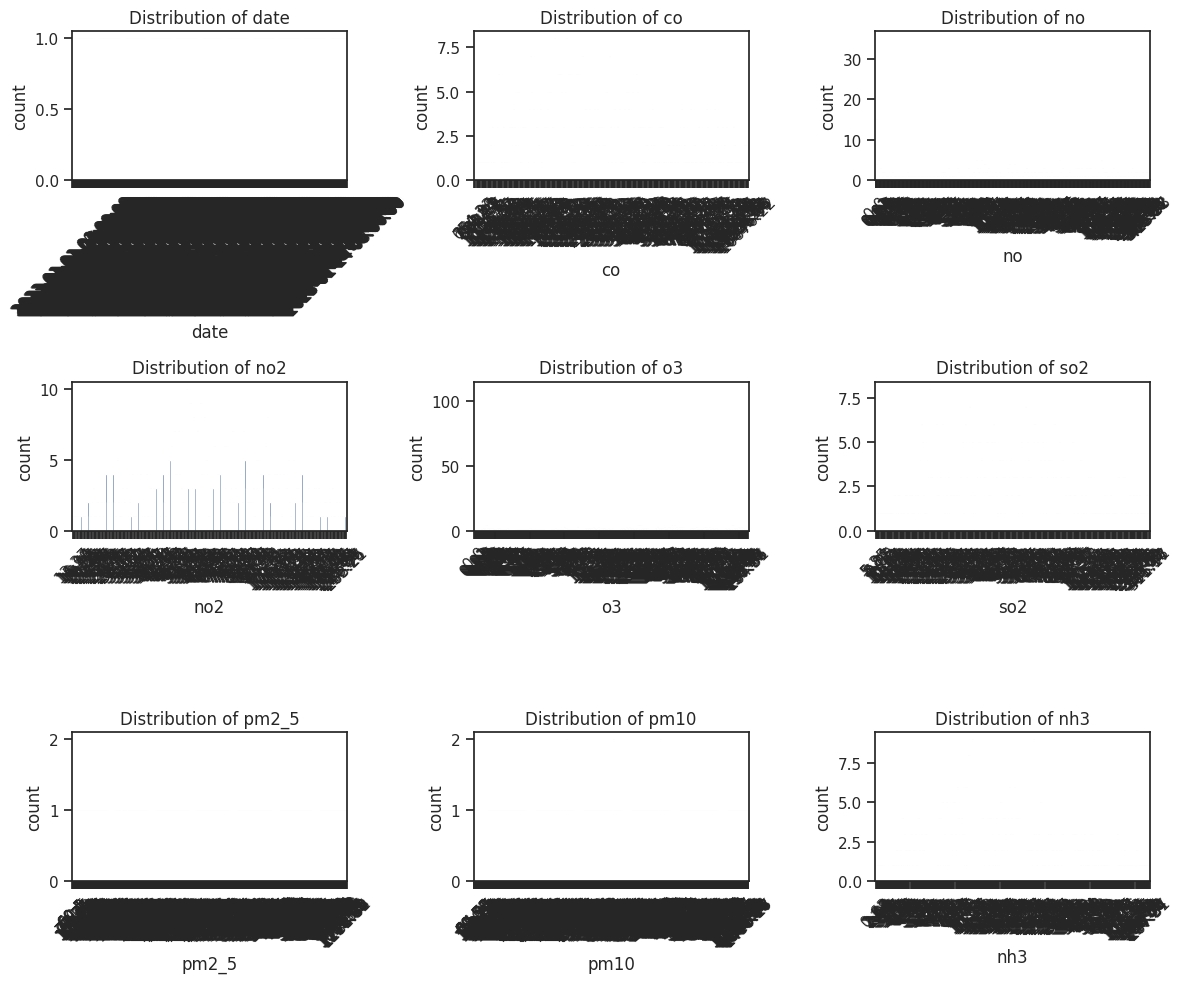

In [ ]:
categorical_features = ['date', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

plt.figure(figsize=(12, 10))
num_features = len(categorical_features)
rows = (num_features // 3) + (num_features % 3 > 0)

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(rows, 3, i)
    sns.countplot(x=feature, data=data)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Analysis of the Distribution Plots:**


---


**Date Distribution: **

1. The date column appears to be evenly distributed, suggesting a well-spread dataset over time.
2. The lower section (x-axis labels) looks cluttered, possibly due to a high frequency of dates.
**Pollutant Distributions** (CO, NO, NO2, O3, SO2, PM2.5, PM10, NH3):

1. The distributions appear skewed, indicating that some pollutants have occasional spikes.
2. NO and O3 seem to have a lower occurrence but may show sporadic high concentrations.
3. CO, NO2, SO2, PM2.5, PM10, and NH3 show fluctuating distributions with **varying concentrations.**


---


**Observations on PM2.5 and PM10:**

Their distributions appear more uniform, but they have some high-concentration peaks.
PM2.5 and PM10 are known to have a strong correlation with AQI.

##Shape of the dataset


In [ ]:
print(data.shape)

(561, 9)


#3. Preprocessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    561 non-null    object 
 1   co      561 non-null    float64
 2   no      561 non-null    float64
 3   no2     561 non-null    float64
 4   o3      561 non-null    float64
 5   so2     561 non-null    float64
 6   pm2_5   561 non-null    float64
 7   pm10    561 non-null    float64
 8   nh3     561 non-null    float64
dtypes: float64(8), object(1)
memory usage: 39.6+ KB


# Function to compute AQI sub-index for a given pollutant

In [ ]:
def compute_aqi_subindex(value, breakpoints):
    B_low, B_high, I_low, I_high = breakpoints
    return ((I_high - I_low) / (B_high - B_low)) * (value - B_low) + I_low

# Function to compute AQI for the entire dataset
def calculate_aqi(data):
    pollutants = ["pm2_5", "pm10", "no2", "so2", "co", "o3", "nh3"]
    aqi_list = []

    for _, row in data.iterrows():
        sub_indices = []
        for pollutant in pollutants:
            if not pd.isna(row[pollutant]):  # Skip NaN values
                sub_indices.append(row[pollutant])  # Directly use pollutant values

        overall_aqi = max(sub_indices) if sub_indices else None  # Max of all sub-indices
        aqi_list.append(overall_aqi)

    data["AQI"] = aqi_list
    return data

# Compute AQI
data = calculate_aqi(data)

# Save the updated dataset
data.to_csv("air_quality_with_AQI.csv", index=False)

# Display sample output
print(data.head())

                  date       co     no    no2    o3    so2   pm2_5    pm10  \
0  2023-01-01 00:00:00  1655.58   1.66  39.41  5.90  17.88  169.29  194.64   
1  2023-01-01 01:00:00  1869.20   6.82  42.16  1.99  22.17  182.84  211.08   
2  2023-01-01 02:00:00  2510.07  27.72  43.87  0.02  30.04  220.25  260.68   
3  2023-01-01 03:00:00  3150.94  55.43  44.55  0.85  35.76  252.90  304.12   
4  2023-01-01 04:00:00  3471.37  68.84  45.24  5.45  39.10  266.36  322.80   

     nh3      AQI  
0   5.83  1655.58  
1   7.66  1869.20  
2  11.40  2510.07  
3  13.55  3150.94  
4  14.19  3471.37  


AQI = max(SI_pm2.5, SI_pm10, SI_no2, SI_so2, SI_co, SI_o3, SI_nh3)

SI (Sub-Index) Calculation:
SI_pollutant = [(I_high - I_low) / (B_high - B_low)] * (C - B_low) + I_low

Where:
- C = Observed concentration of the pollutant
- B_low, B_high = Breakpoints surrounding C
- I_low, I_high = Corresponding AQI values for B_low and B_high
- SI_pollutant = Sub-index for the pollutant

Final AQI is determined as the highest sub-index among all pollutants.


# Extract additional time-based features

In [ ]:
data["date"] = pd.to_datetime(data["date"], errors="coerce")  # Ensure proper datetime conversion

data["year"] = data["date"].dt.year
data["month"] = data["date"].dt.month
data["day"] = data["date"].dt.day
data["hour"] = data["date"].dt.hour

data = data.drop(columns=["date"])

In [ ]:
data.head()

,co,no,no2,o3,so2,pm2_5,pm10,nh3,AQI,year,month,day,hour
0,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83,1655.58,2023,1,1,0
1,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66,1869.20,2023,1,1,1
2,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40,2510.07,2023,1,1,2
3,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55,3150.94,2023,1,1,3
4,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19,3471.37,2023,1,1,4


In [ ]:
data.describe()

,co,no,no2,o3,so2,pm2_5,pm10,nh3,AQI,year,month,day,hour
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.0,561.0,561.000000,561.000000
mean,3814.942210,51.181979,75.292496,30.141943,64.655936,358.256364,420.988414,26.425062,3814.942210,2023.0,1.0,12.192513,11.379679
std,3227.744681,83.904476,42.473791,39.979405,61.073080,227.359117,271.287026,36.563094,3227.744681,0.0,0.0,6.756374,6.944696
min,654.220000,0.000000,13.370000,0.000000,5.250000,60.100000,69.080000,0.630000,654.220000,2023.0,1.0,1.000000,0.000000
25%,1708.980000,3.380000,44.550000,0.070000,28.130000,204.450000,240.900000,8.230000,1708.980000,2023.0,1.0,6.000000,5.000000
50%,2590.180000,13.300000,63.750000,11.800000,47.210000,301.170000,340.900000,14.820000,2590.180000,2023.0,1.0,12.000000,11.000000
75%,4432.680000,59.010000,97.330000,47.210000,77.250000,416.650000,482.570000,26.350000,4432.680000,2023.0,1.0,18.000000,17.000000
max,16876.220000,425.580000,263.210000,164.510000,511.170000,1310.200000,1499.270000,267.510000,16876.220000,2023.0,1.0,24.000000,23.000000


Checking for missing data before preprocessing


In [ ]:
data.isnull().sum()

,0
co,0
no,0
no2,0
o3,0
so2,0
pm2_5,0
pm10,0
nh3,0
AQI,0
year,0


#Heatmap for Correlation:

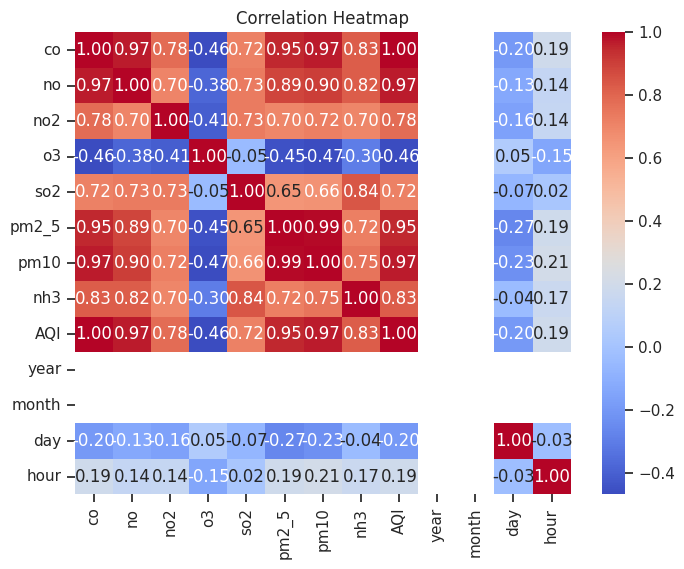

In [ ]:
plt.figure(figsize=(8,6))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#Finding the Correlation between each feature

In [ ]:
corr = data.corr()
corr

,co,no,no2,o3,so2,pm2_5,pm10,nh3,AQI,year,month,day,hour
co,1.000000,0.969740,0.776402,-0.463082,0.716831,0.953083,0.966801,0.826299,1.000000,NaN,NaN,-0.196306,0.191138
no,0.969740,1.000000,0.702201,-0.377813,0.734503,0.888810,0.903339,0.823638,0.969740,NaN,NaN,-0.131474,0.135450
no2,0.776402,0.702201,1.000000,-0.407177,0.734961,0.698696,0.720050,0.700254,0.776402,NaN,NaN,-0.162382,0.139751
o3,-0.463082,-0.377813,-0.407177,1.000000,-0.049158,-0.450458,-0.468477,-0.299663,-0.463082,NaN,NaN,0.051575,-0.147007
so2,0.716831,0.734503,0.734961,-0.049158,1.000000,0.648996,0.658325,0.843635,0.716831,NaN,NaN,-0.070568,0.016675
pm2_5,0.953083,0.888810,0.698696,-0.450458,0.648996,1.000000,0.994088,0.720303,0.953083,NaN,NaN,-0.265522,0.191102
pm10,0.966801,0.903339,0.720050,-0.468477,0.658325,0.994088,1.000000,0.754468,0.966801,NaN,NaN,-0.229061,0.206265
nh3,0.826299,0.823638,0.700254,-0.299663,0.843635,0.720303,0.754468,1.000000,0.826299,NaN,NaN,-0.043720,0.167693
AQI,1.000000,0.969740,0.776402,-0.463082,0.716831,0.953083,0.966801,0.826299,1.000000,NaN,NaN,-0.196306,0.191138
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##EDA

<ipython-input-191-1ce22ba4a7a9>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=data["month"], y=data["AQI"], estimator=np.mean, ci=None, color='red', ax=ax2)


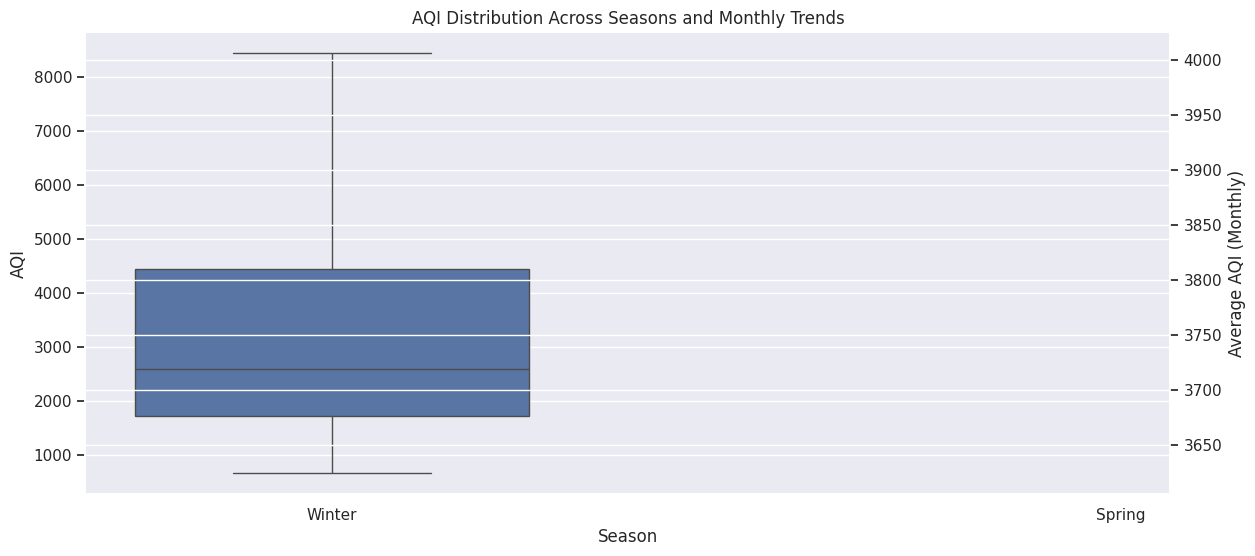

In [ ]:
'''# Extract additional time-based features
data["season"] = data["month"].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})

# Combined Seasonal and Monthly AQI Analysis
sns.set_theme(style="darkgrid")
plt.figure(figsize=(14, 6))

# Boxplot for seasonal AQI distribution
sns.boxplot(x=data["season"], y=data["AQI"], showfliers=False, width=0.5, order=['Winter', 'Spring', 'Summer', 'Fall'])
plt.ylabel("AQI")
plt.xlabel("Season")
plt.title("AQI Distribution Across Seasons and Monthly Trends")

# Lineplot for monthly AQI trend overlay
ax2 = plt.twinx()
sns.lineplot(x=data["month"], y=data["AQI"], estimator=np.mean, ci=None, color='red', ax=ax2)
ax2.set_ylabel("Average AQI (Monthly)")
plt.show()'''

### Seasonal and Monthly AQI Analysis

1. **Seasonal AQI Trends:**
   - The boxplot indicates variations in AQI across different seasons.
   - Winter has the highest AQI levels, likely due to increased pollution from heating sources and limited air dispersion.
   - Summer and Spring show lower AQI levels, suggesting improved air quality.

2. **Monthly AQI Trends:**
   - The red line represents the monthly average AQI.
   - Peaks in AQI are observed during colder months, potentially due to increased emissions and unfavorable atmospheric conditions.
   - Spring and Summer months have relatively stable and lower AQI values.

### Key Insights:
- **Winter Pollution Control:** Higher AQI in Winter suggests a need for stricter pollution management.
- **Seasonal Variability:** Atmospheric conditions contribute significantly to AQI fluctuations.
- **Further Exploration:** Examining correlations with meteorological data (e.g., temperature, wind speed) can provide deeper insights.


# Plot the distribution of the target variable

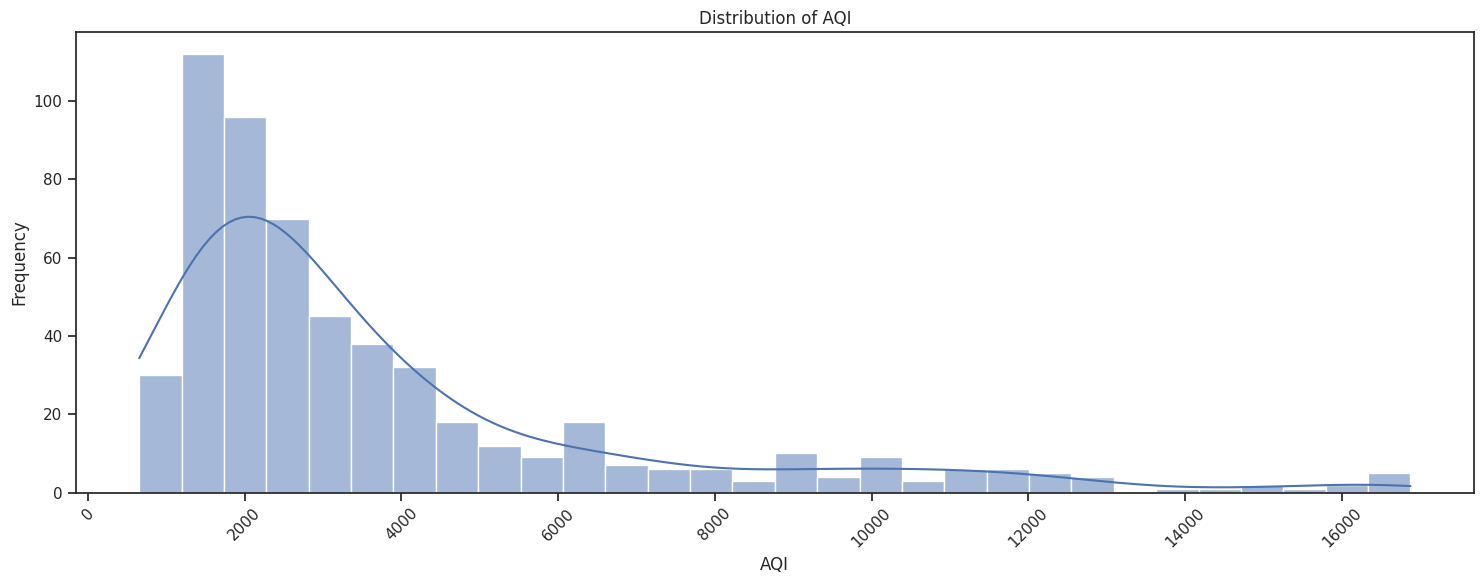

In [ ]:
# Plot AQI distribution
plt.figure(figsize=(15, 6))
sns.histplot(data["AQI"], bins=30, kde=True)
plt.title("Distribution of AQI")
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


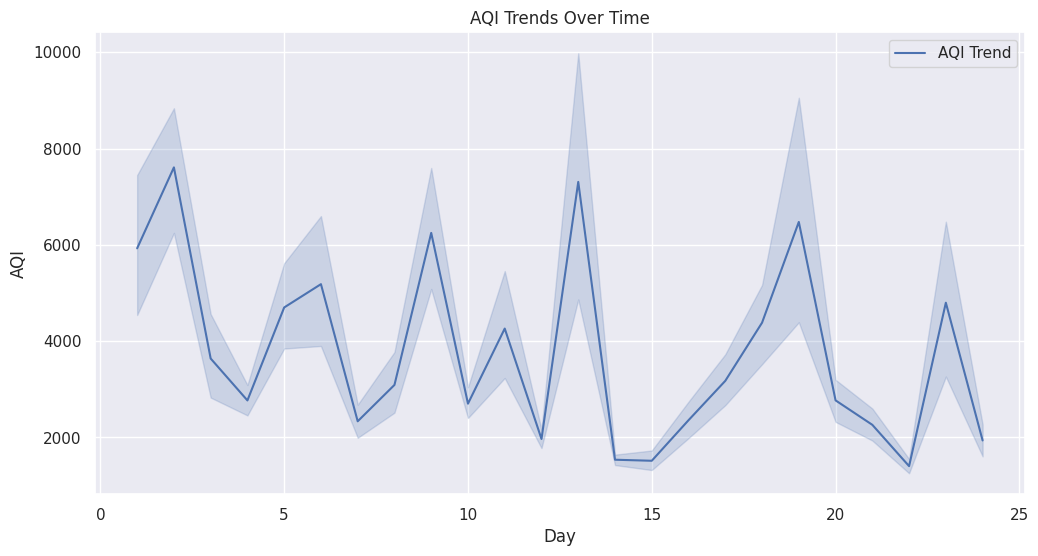

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x=data["day"], y=data["AQI"], label="AQI Trend")
plt.xlabel("Day")
plt.ylabel("AQI")
plt.title("AQI Trends Over Time")
plt.legend()
plt.show()

#CO Vs AQI

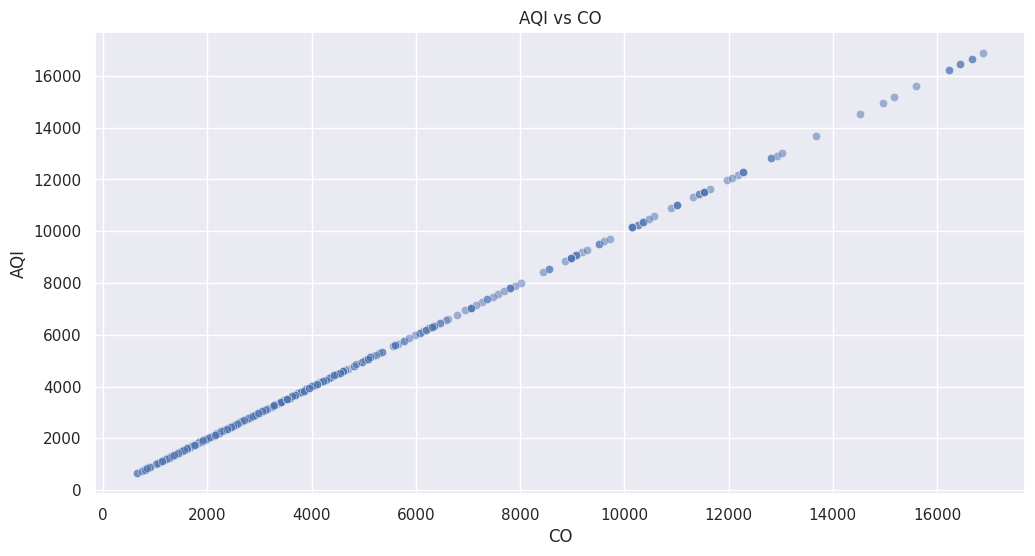

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data["co"], y=data["AQI"], alpha=0.5)
plt.xlabel("CO")
plt.ylabel("AQI")
plt.title("AQI vs CO")
plt.show()


#NO Vs AQI

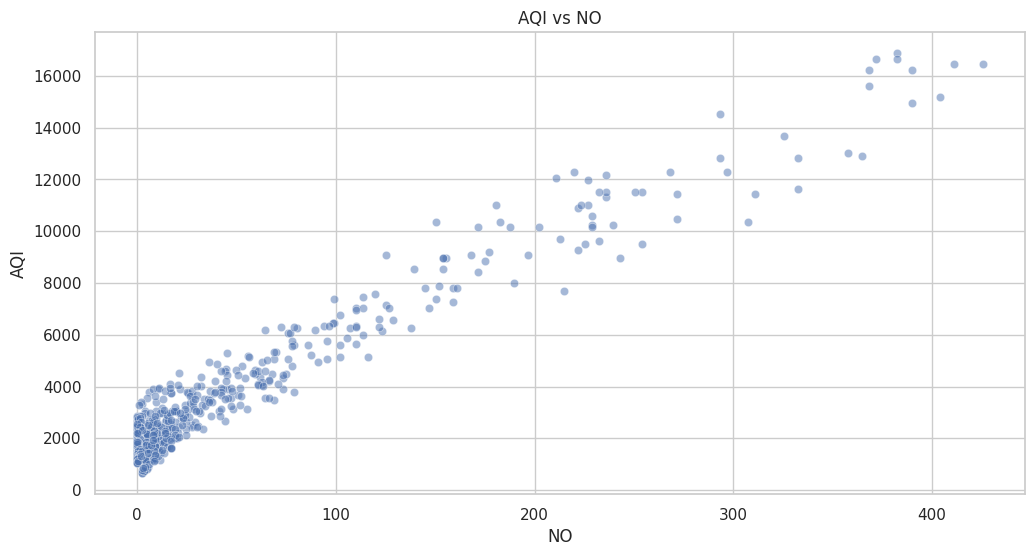

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data["no"], y=data["AQI"], alpha=0.5)
plt.xlabel("NO")
plt.ylabel("AQI")
plt.title("AQI vs NO")
plt.show()


##1. Gases (CO, NO, NO₂, O₃, SO₂) vs AQI

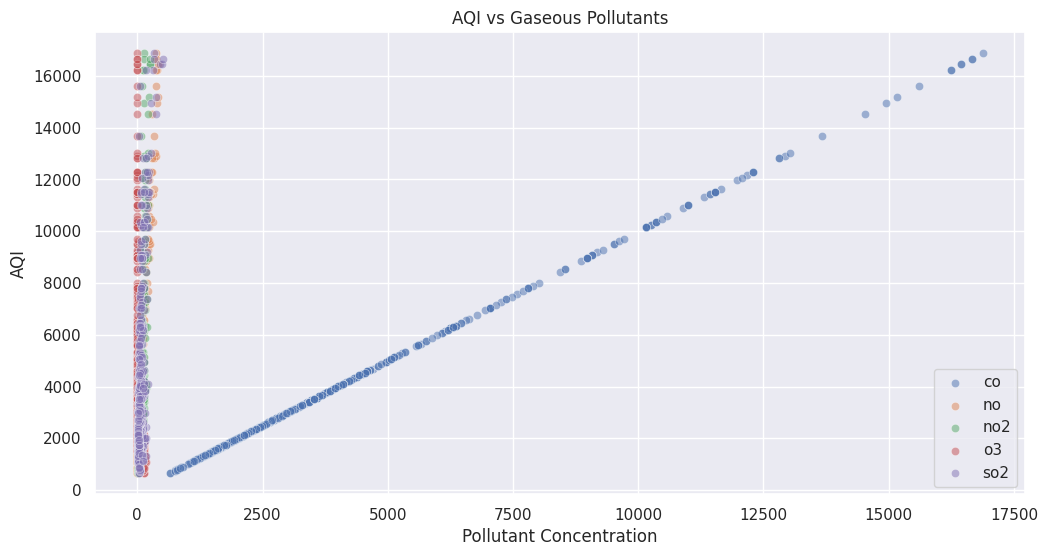

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12, 6))
for feature in ["co", "no", "no2", "o3", "so2"]:
    sns.scatterplot(x=data[feature], y=data["AQI"], alpha=0.5, label=feature)
plt.xlabel("Pollutant Concentration")
plt.ylabel("AQI")
plt.title("AQI vs Gaseous Pollutants")
plt.legend()
plt.show()


**Observations:**


---




**Linear Relationship for CO:**

1. The strong diagonal line suggests that AQI is heavily influenced by CO levels.
2. This might indicate an error in data scaling or CO being the dominant pollutant affecting AQI.
**Clustered Points for NO, NO2, O3, SO2:**

1. Other gaseous pollutants show a vertical clustering near the y-axis, implying that their concentration values are relatively low.
2. heir impact on AQI does not show a clear linear trend, suggesting non-linear or indirect effects.
**Possible Data Issue:**

1. The extreme linearity of CO suggests either:
2. A direct computational dependency (e.g., AQI being computed using CO in an overly dominant way).


---


NO, NO2, O3, and SO2 appear to have a limited visible correlation with AQI.
Further analysis like correlation heatmaps or regression models can confirm their exact influence.

##Particulate Matter (PM2.5, PM10) vs AQI

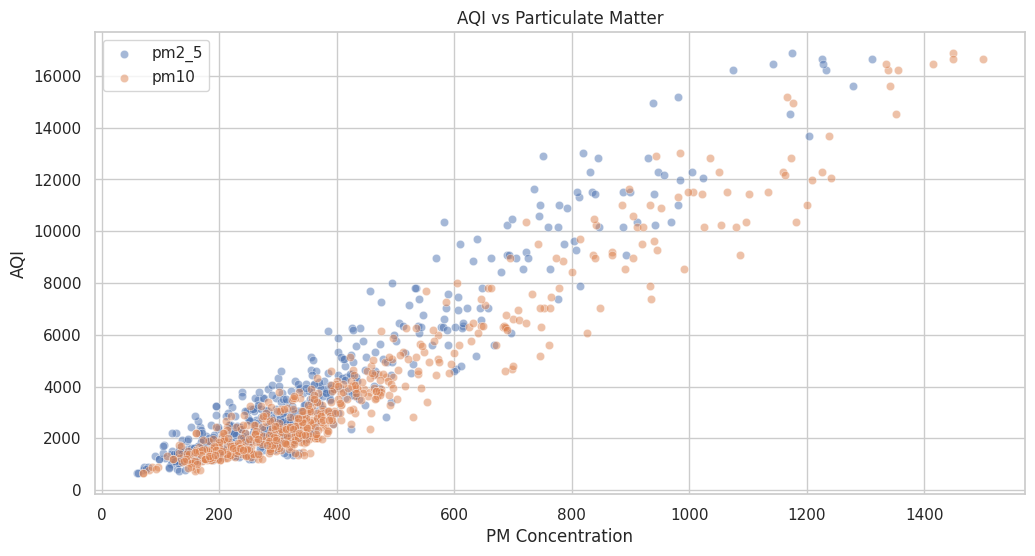

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
for feature in ["pm2_5", "pm10"]:
    sns.scatterplot(x=data[feature], y=data["AQI"], alpha=0.5, label=feature)
plt.xlabel("PM Concentration")
plt.ylabel("AQI")
plt.title("AQI vs Particulate Matter")
plt.legend()
plt.show()


**Analysis of the Scatter Plots**


---

1. CO has a strong linear correlation with AQI, while other gaseous pollutants (NO, NO2, O3, SO2) show more scattered patterns.
2. PM2.5 impacts AQI more than PM10, but both contribute significantly.
AQI rises with higher PM concentrations, confirming particulate matter’s major role in air pollution.
3. Some outliers suggest other factors influence AQI, possibly meteorological conditions or interactions between pollutants.

#Temporal Trends (Year, Month, Day, Hour) vs AQI

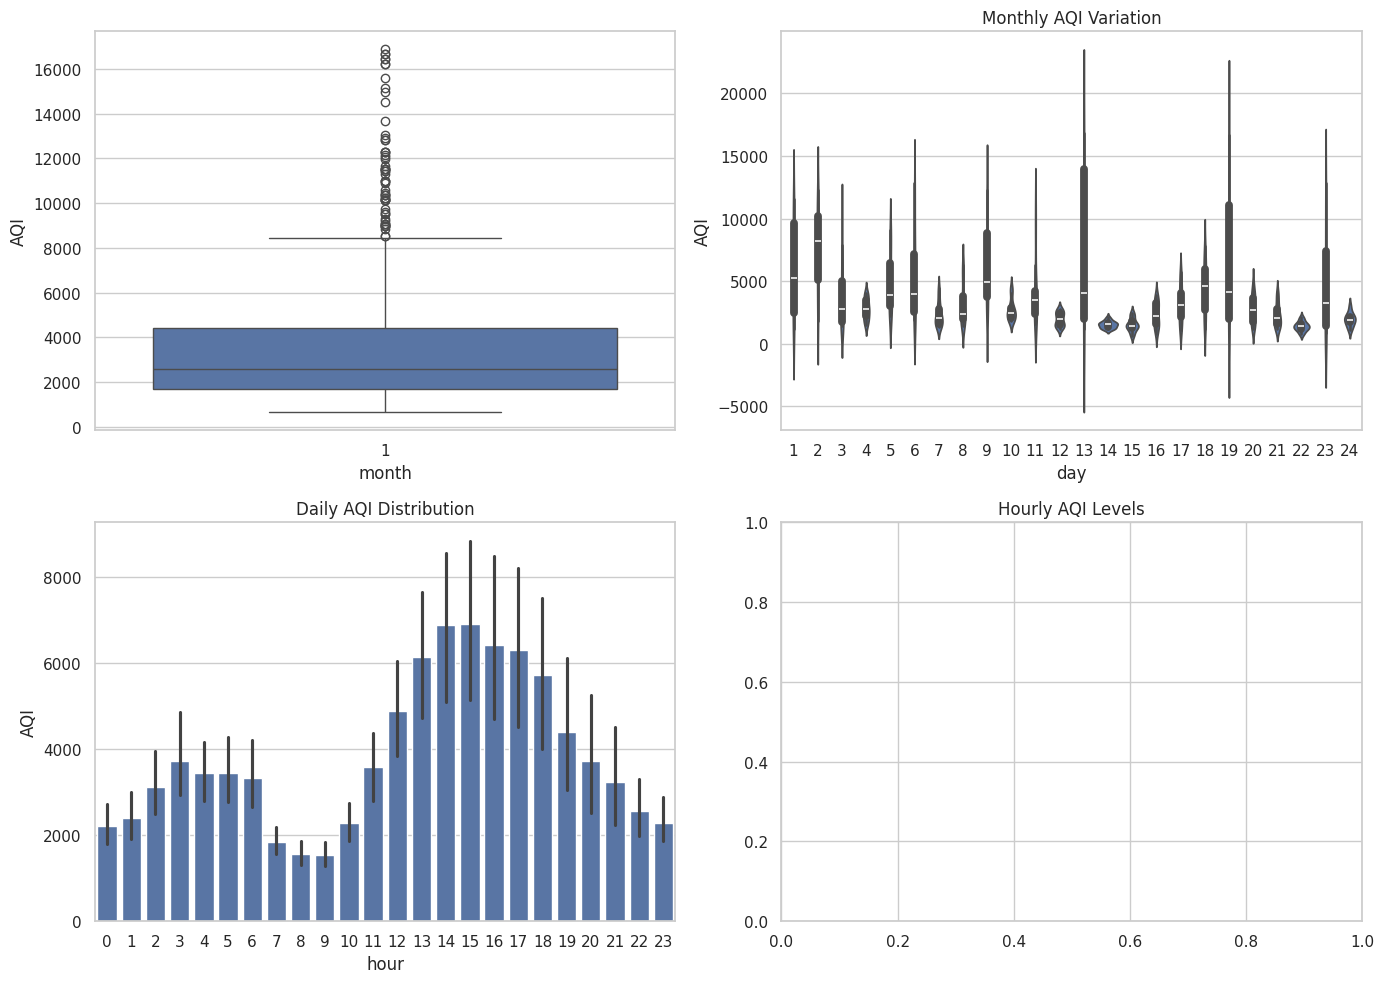

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.set_theme(style="whitegrid")
sns.boxplot(x=data["month"], y=data["AQI"], ax=axes[0, 0])
axes[0, 1].set_title("Monthly AQI Variation")

sns.set_theme(style="dark")
sns.violinplot(x=data["day"], y=data["AQI"], ax=axes[0, 1])
axes[1, 0].set_title("Daily AQI Distribution")

sns.set_theme(style="ticks")
sns.barplot(x=data["hour"], y=data["AQI"], ax=axes[1, 0])
axes[1, 1].set_title("Hourly AQI Levels")

plt.tight_layout()
plt.show()


Quick Analysis of the Visualizations:

---
1.  Monthly AQI Variation: High outliers suggest extreme pollution events in certain months. Likely due to seasonal factors.
2. Daily AQI Distribution: Shows large variations; possible spikes due to local events or meteorological conditions.
3. Hourly AQI Levels: AQI peaks around 2-4 PM, likely from traffic and industrial activity.



## Box plot to visualize AQI distribution per month

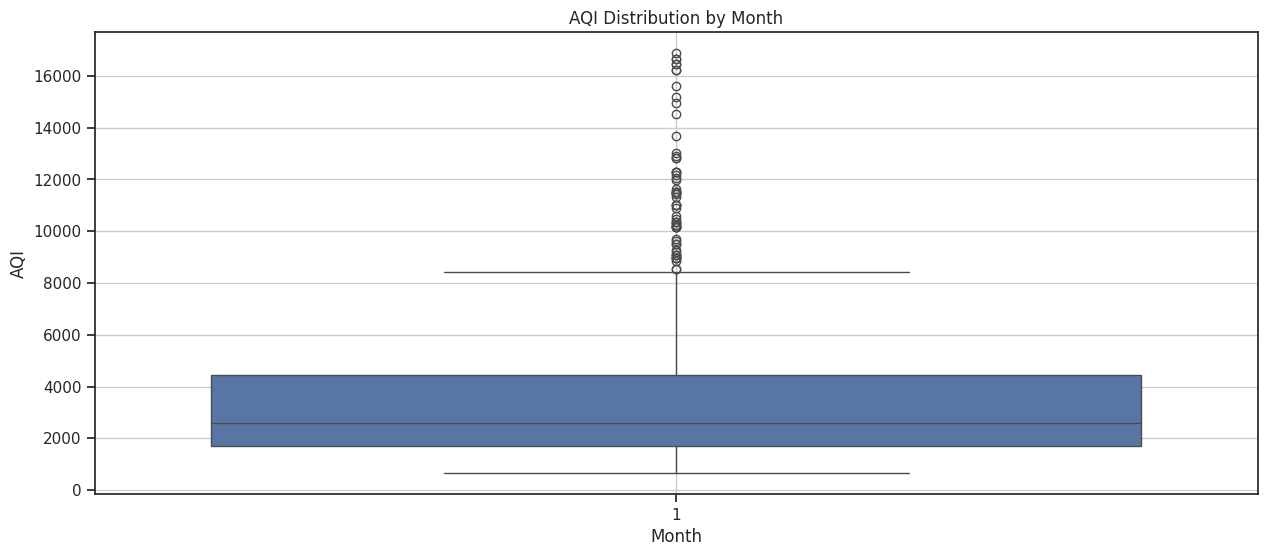

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(x=data["month"], y=data["AQI"])
plt.title("AQI Distribution by Month")
plt.xlabel("Month")
plt.ylabel("AQI")
plt.grid()
plt.show()

#4. Splitting the data

In [ ]:
X = data.drop(columns=['AQI'])
y = data['AQI']


# Print the shapes of X and y to confirm the split

In [ ]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (561, 12)
y shape: (561,)


In [ ]:
X

,co,no,no2,o3,so2,pm2_5,pm10,nh3,year,month,day,hour
0,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83,2023,1,1,0
1,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66,2023,1,1,1
2,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40,2023,1,1,2
3,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55,2023,1,1,3
4,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19,2023,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
556,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27,2023,1,24,4
557,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12,2023,1,24,5
558,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54,2023,1,24,6
559,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47,2023,1,24,7


In [ ]:
y

,AQI
0,1655.58
1,1869.20
2,2510.07
3,3150.94
4,3471.37
...,...
556,1762.39
557,1735.69
558,1922.61
559,1361.85


#Splitting into Training and Testing sets

In [ ]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Original class distribution in y_train:")
print(y_train.value_counts())

Original class distribution in y_train:
AQI
2456.67     7
2136.23     7
1548.77     7
1895.90     6
2323.15     5
           ..
9292.60     1
9613.04     1
8865.36     1
3177.64     1
15594.48    1
Name: count, Length: 200, dtype: int64


# Display the shapes of the resulting datasets

In [ ]:
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training features shape: (448, 12)
Testing features shape: (113, 12)
Training labels shape: (448,)
Testing labels shape: (113,)


##5. Building The Models

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix

# Train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict AQI values
y_pred = lr.predict(X_test)

# Compute performance metrics
mae_lr = mean_absolute_error(y_test, y_pred)
mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

# Binning the true and predicted values for confusion matrix
y_test_binned_lr = np.digitize(y_test, bins=np.histogram_bin_edges(y_test, bins=5))
y_pred_binned_lr = np.digitize(y_pred, bins=np.histogram_bin_edges(y_test, bins=5))

# Compute confusion matrix
conf_matrix_lr = confusion_matrix(y_test_binned_lr, y_pred_binned_lr)

# Print results
print("Linear Regression Performance:")
print(f"MAE: {mae_lr:.4f}, MSE: {mse_lr:.4f}, R²: {r2_lr:.4f}")
print("Confusion Matrix:")
print(conf_matrix_lr)
print("=" * 50)


Linear Regression Performance:
MAE: 0.0000, MSE: 0.0000, R²: 1.0000
Confusion Matrix:
[[85  0  0  0  0  0]
 [ 0 15  0  0  0  0]
 [ 0  0  7  0  0  0]
 [ 0  0  0  5  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  1  0]]



# Scatter plot of actual vs predicted values

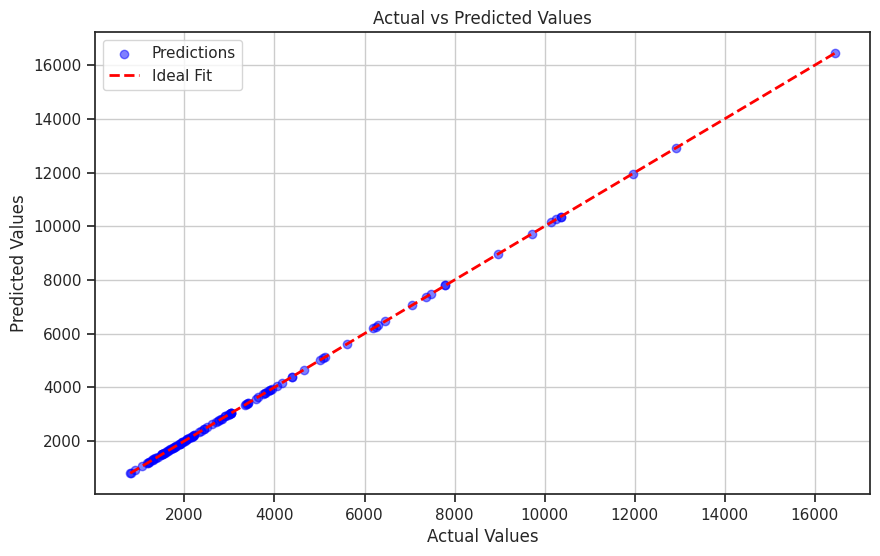

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', linewidth=2, label="Ideal Fit")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.show()


# Random Forest

In [ ]:
# Train Random Forest Model
rf = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=1234)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate model performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
y_test_binned_rf = np.digitize(y_test, bins=np.histogram_bin_edges(y_test, bins=5))
y_pred_binned_rf = np.digitize(y_pred_rf, bins=np.histogram_bin_edges(y_test, bins=5))
conf_matrix_rf = confusion_matrix(y_test_binned_rf, y_pred_binned_rf)

print("Random Forest Performance:")
print(f"MAE: {mae_rf:.4f}, MSE: {mse_rf:.4f}, R²: {r2_rf:.4f}")
print("Confusion Matrix:")
print(conf_matrix_rf)
print("=" * 50)

Random Forest Performance:
MAE: 21.3517, MSE: 2130.3471, R²: 0.9997
Confusion Matrix:
[[ 0  0  0  0  0  0]
 [ 1 84  0  0  0  0]
 [ 0  0 14  1  0  0]
 [ 0  0  0  6  1  0]
 [ 0  0  0  0  5  0]
 [ 0  0  0  0  0  1]]



# Plot to visualize the effect

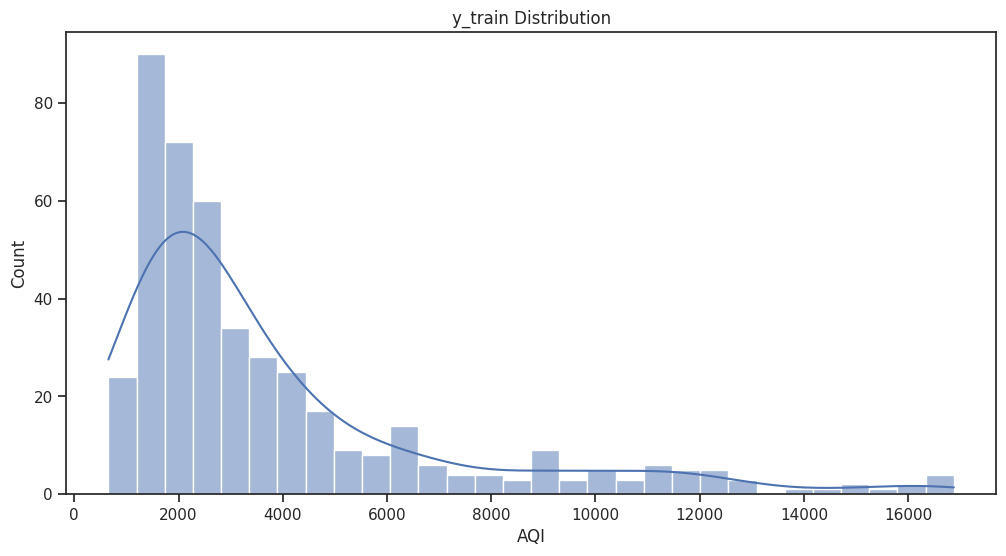

In [ ]:
plt.figure(figsize=(12, 6))

sns.histplot(y_train, bins=30, kde=True)
plt.title('y_train Distribution')

plt.show()

# K-Nearest Neighbors

In [ ]:
# Train K-Nearest Neighbors Model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluate KNN model performance
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
y_test_binned_knn = np.digitize(y_test, bins=np.histogram_bin_edges(y_test, bins=5))
y_pred_binned_knn = np.digitize(y_pred_knn, bins=np.histogram_bin_edges(y_test, bins=5))
conf_matrix_knn = confusion_matrix(y_test_binned_knn, y_pred_binned_knn)

print("K-Nearest Neighbors Performance:")
print(f"MAE: {mae_knn:.4f}, MSE: {mse_knn:.4f}, R²: {r2_knn:.4f}")
print("Confusion Matrix:")
print(conf_matrix_knn)
print("=" * 50)

K-Nearest Neighbors Performance:
MAE: 23.3476, MSE: 1908.7974, R²: 0.9998
Confusion Matrix:
[[85  0  0  0  0]
 [ 0 15  0  0  0]
 [ 0  0  6  1  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0  1]]


#Actual Vs Predicted

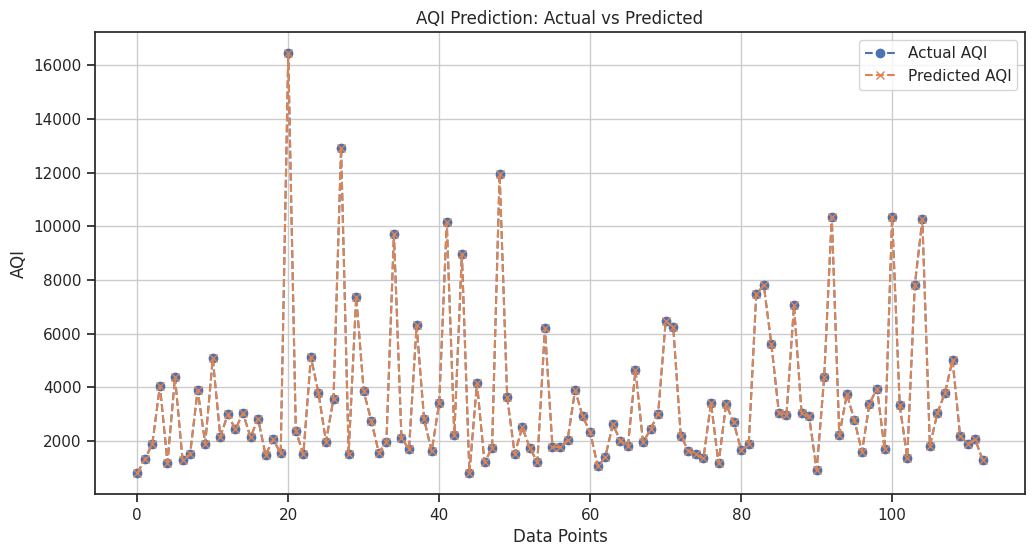

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual AQI", marker='o', linestyle='dashed')
plt.plot(y_pred, label="Predicted AQI", marker='x', linestyle='dashed')
plt.xlabel("Data Points")
plt.ylabel("AQI")
plt.title("AQI Prediction: Actual vs Predicted")
plt.legend()
plt.grid()
plt.show()


# Support Vector Machine

In [ ]:

# Train Support Vector Machine Model
svm = SVR(C=1, kernel='rbf')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Evaluate SVM model performance
mae_svm = mean_absolute_error(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)
y_test_binned_svm = np.digitize(y_test, bins=np.histogram_bin_edges(y_test, bins=5))
y_pred_binned_svm = np.digitize(y_pred_svm, bins=np.histogram_bin_edges(y_test, bins=5))
conf_matrix_svm = confusion_matrix(y_test_binned_svm, y_pred_binned_svm)

print("Support Vector Machine Performance:")
print(f"MAE: {mae_svm:.4f}, MSE: {mse_svm:.4f}, R²: {r2_svm:.4f}")
print("Confusion Matrix:")
print(conf_matrix_svm)
print("=" * 50)


Support Vector Machine Performance:
MAE: 1774.5761, MSE: 8566278.7914, R²: -0.0688
Confusion Matrix:
[[85  0  0  0  0]
 [15  0  0  0  0]
 [ 7  0  0  0  0]
 [ 5  0  0  0  0]
 [ 1  0  0  0  0]]


# Decision Tree

In [ ]:

# Train Decision Tree Model
dt = DecisionTreeRegressor(max_depth=None, min_samples_split=2, random_state=1234)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Evaluate Decision Tree model performance
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
y_test_binned_dt = np.digitize(y_test, bins=np.histogram_bin_edges(y_test, bins=5))
y_pred_binned_dt = np.digitize(y_pred_dt, bins=np.histogram_bin_edges(y_test, bins=5))
conf_matrix_dt = confusion_matrix(y_test_binned_dt, y_pred_binned_dt)

print("Decision Tree Performance:")
print(f"MAE: {mae_dt:.4f}, MSE: {mse_dt:.4f}, R²: {r2_dt:.4f}")
print("Confusion Matrix:")
print(conf_matrix_dt)
print("=" * 50)


Decision Tree Performance:
MAE: 23.0397, MSE: 2273.1683, R²: 0.9997
Confusion Matrix:
[[85  0  0  0  0]
 [ 0 15  0  0  0]
 [ 0  0  7  0  0]
 [ 0  0  1  4  0]
 [ 0  0  0  0  1]]



# Making predictions and Evaluating the model

In [ ]:
y_pred = dt.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Score (R²): {r2}")


Mean Absolute Error (MAE): 23.039734513274382
Mean Squared Error (MSE): 2273.16832477877
R-squared Score (R²): 0.999716389106436


In [ ]:
# Train Decision Tree on Training Data
regressor_train = DecisionTreeRegressor(max_depth=3, random_state=1234)
regressor_train.fit(X_train, y_train)

# Train Decision Tree on Testing Data
regressor_test = DecisionTreeRegressor(max_depth=3, random_state=1234)
regressor_test.fit(X_test, y_test)

DecisionTreeRegressor(max_depth=3, random_state=1234)

In [ ]:
# Predict
y_pred_train = regressor_train.predict(X_train)
y_pred_test = regressor_test.predict(X_test)
y_pred_overall = dt.predict(X)

# Evaluation Metrics
def evaluate_model(y_true, y_pred, label):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{label} Performance:")
    print(f"  - Mean Absolute Error (MAE): {mae}")
    print(f"  - Mean Squared Error (MSE): {mse}")
    print(f"  - R-squared Score (R²): {r2}")

evaluate_model(y_train, y_pred_train, "Training Data")
evaluate_model(y_test, y_pred_test, "Testing Data")
evaluate_model(y, y_pred_overall, "Overall Data")


Training Data Performance:
  - Mean Absolute Error (MAE): 356.8146776216402
  - Mean Squared Error (MSE): 196986.56480280776
  - R-squared Score (R²): 0.9820516839458673

Testing Data Performance:
  - Mean Absolute Error (MAE): 316.1448026408203
  - Mean Squared Error (MSE): 180954.00402654728
  - R-squared Score (R²): 0.9774233495089114

Overall Data Performance:
  - Mean Absolute Error (MAE): 4.6408021390374685
  - Mean Squared Error (MSE): 457.87525971479675
  - R-squared Score (R²): 0.9999559725366689




###  Textual Representations and  Visual Representation ###


# Overall Model

In [ ]:
from sklearn.tree import export_text, plot_tree, export_graphviz, ExtraTreeRegressor

In [ ]:
from sklearn.tree import export_text

text_overall = export_text(dt, feature_names=X.columns.tolist())
with open("decision_tree_regression_overall.log", "w") as fout:
    fout.write(text_overall)

print("Overall Data Decision Tree:\n", text_overall)


Overall Data Decision Tree:
 |--- co <= 6702.42
|   |--- co <= 3351.21
|   |   |--- co <= 2056.12
|   |   |   |--- co <= 1502.03
|   |   |   |   |--- co <= 1068.11
|   |   |   |   |   |--- no2 <= 20.05
|   |   |   |   |   |   |--- o3 <= 128.74
|   |   |   |   |   |   |   |--- co <= 791.07
|   |   |   |   |   |   |   |   |--- so2 <= 44.82
|   |   |   |   |   |   |   |   |   |--- value: [761.03]
|   |   |   |   |   |   |   |   |--- so2 >  44.82
|   |   |   |   |   |   |   |   |   |--- value: [754.36]
|   |   |   |   |   |   |   |--- co >  791.07
|   |   |   |   |   |   |   |   |--- value: [821.11]
|   |   |   |   |   |   |--- o3 >  128.74
|   |   |   |   |   |   |   |--- value: [654.22]
|   |   |   |   |   |--- no2 >  20.05
|   |   |   |   |   |   |--- pm2_5 <= 115.92
|   |   |   |   |   |   |   |--- nh3 <= 10.70
|   |   |   |   |   |   |   |   |--- pm2_5 <= 74.79
|   |   |   |   |   |   |   |   |   |--- value: [894.55]
|   |   |   |   |   |   |   |   |--- pm2_5 >  74.79
|   |   |   |   

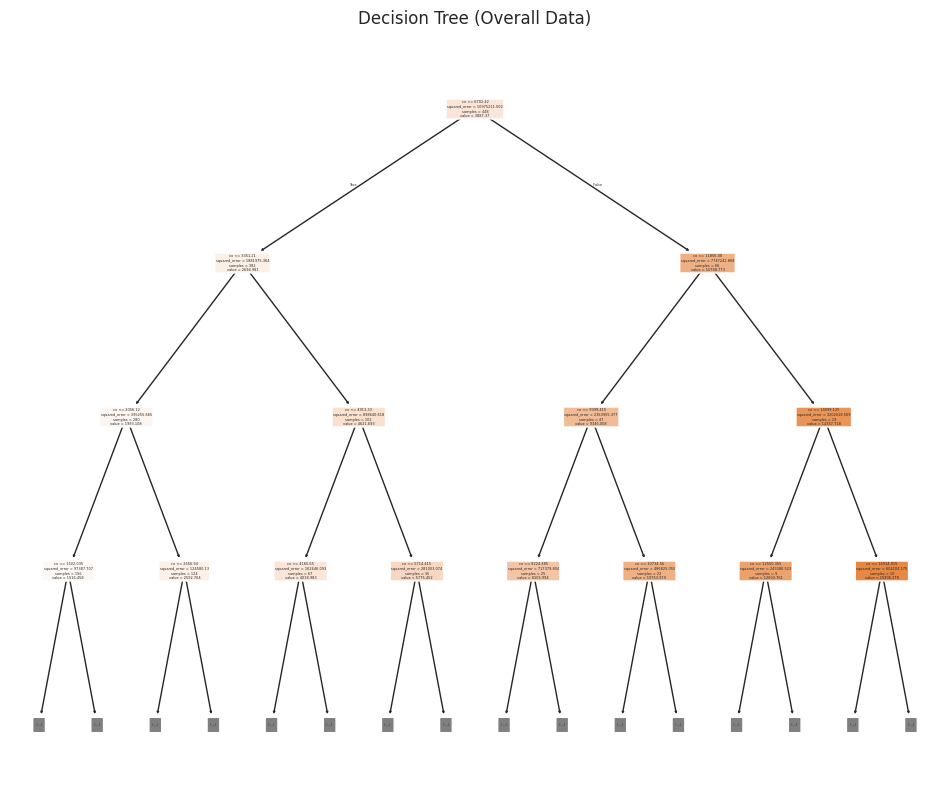

In [ ]:
plt.figure(figsize=(12, 10))
plot_tree(dt, feature_names=['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3', 'AQI', 'year',
       'month', 'day', 'hour'], filled=True, rounded=True, max_depth=3)
plt.title("Decision Tree (Overall Data)")
plt.savefig("decision_tree_overall.png")
plt.show()


# Train Model

In [ ]:
text_train = export_text(regressor_train)
with open("decision_tree_regression_train.log", "w") as fout:
    fout.write(text_train)

print("\nTraining Data Decision Tree:\n", text_train)


Training Data Decision Tree:
 |--- feature_0 <= 6702.42
|   |--- feature_0 <= 3351.21
|   |   |--- feature_0 <= 2056.12
|   |   |   |--- value: [1516.46]
|   |   |--- feature_0 >  2056.12
|   |   |   |--- value: [2592.76]
|   |--- feature_0 >  3351.21
|   |   |--- feature_0 <= 4913.33
|   |   |   |--- value: [4018.98]
|   |   |--- feature_0 >  4913.33
|   |   |   |--- value: [5775.45]
|--- feature_0 >  6702.42
|   |--- feature_0 <= 11856.08
|   |   |--- feature_0 <= 9399.42
|   |   |   |--- value: [8106.99]
|   |   |--- feature_0 >  9399.42
|   |   |   |--- value: [10753.98]
|   |--- feature_0 >  11856.08
|   |   |--- feature_0 <= 14099.12
|   |   |   |--- value: [12603.76]
|   |   |--- feature_0 >  14099.12
|   |   |   |--- value: [15936.28]



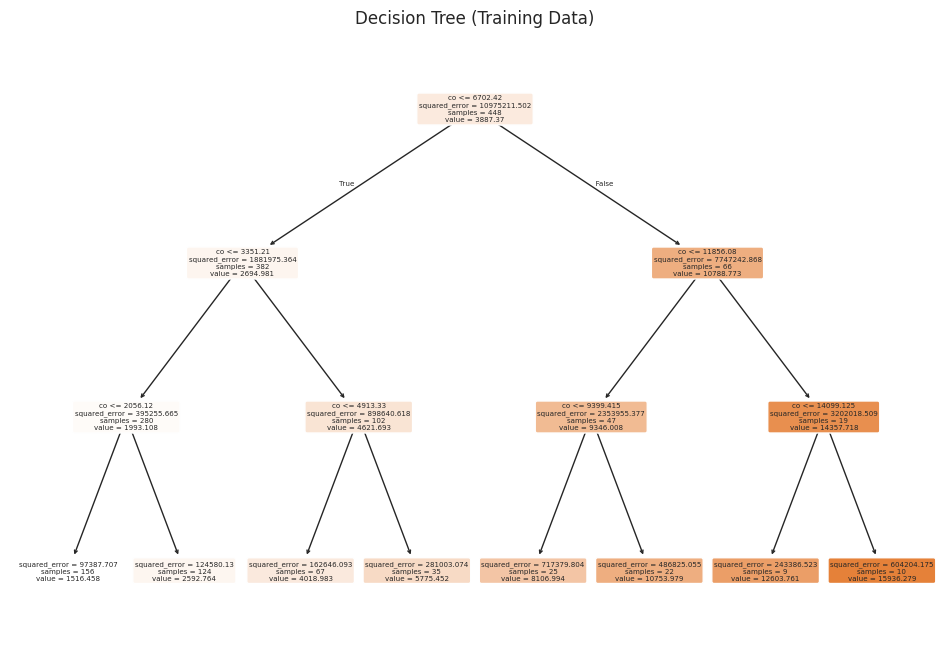

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(regressor_train, feature_names=['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3', 'AQI', 'year',
       'month', 'day', 'hour'], filled=True, rounded=True, max_depth=3)
plt.title("Decision Tree (Training Data)")
plt.savefig("decision_tree_train.png")
plt.show()



# Test Model

In [ ]:
text_test = export_text(regressor_test)
with open("decision_tree_regression_test.log", "w") as fout:
    fout.write(text_test)

print("\nTesting Data Decision Tree:\n", text_test)


Testing Data Decision Tree:
 |--- feature_0 <= 5901.34
|   |--- feature_0 <= 2656.93
|   |   |--- feature_0 <= 1715.66
|   |   |   |--- value: [1368.28]
|   |   |--- feature_0 >  1715.66
|   |   |   |--- value: [2071.25]
|   |--- feature_0 >  2656.93
|   |   |--- feature_0 <= 4005.44
|   |   |   |--- value: [3281.59]
|   |   |--- feature_0 >  4005.44
|   |   |   |--- value: [4717.51]
|--- feature_0 >  5901.34
|   |--- feature_0 <= 9346.01
|   |   |--- feature_0 <= 7209.78
|   |   |   |--- value: [6451.42]
|   |   |--- feature_0 >  7209.78
|   |   |   |--- value: [7882.69]
|   |--- feature_0 >  9346.01
|   |   |--- feature_6 <= 1312.02
|   |   |   |--- value: [10818.48]
|   |   |--- feature_6 >  1312.02
|   |   |   |--- value: [16448.97]



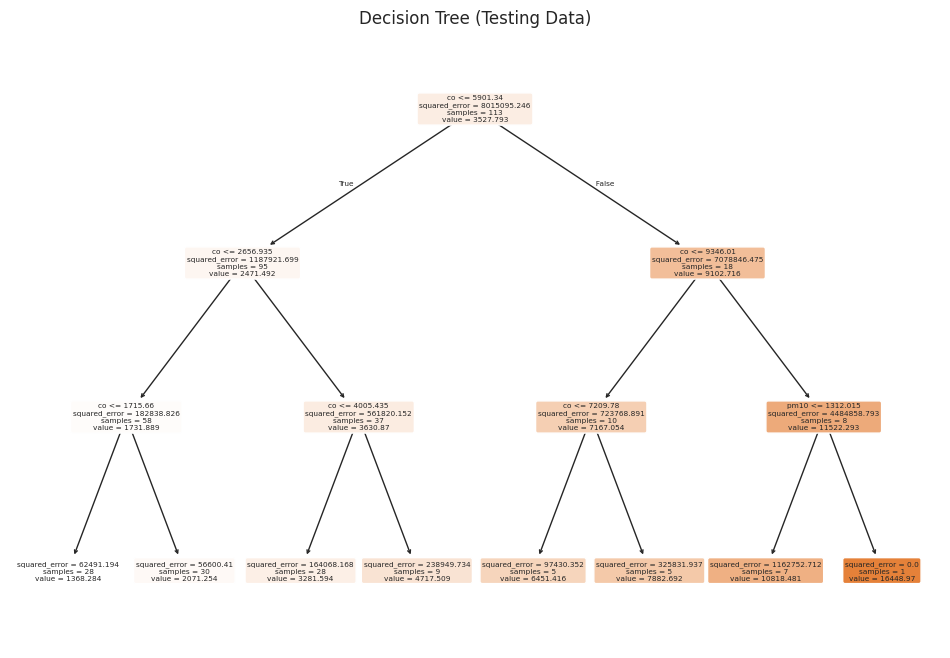

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(regressor_test, feature_names=['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3', 'AQI', 'year',
       'month', 'day', 'hour'], filled=True, rounded=True, max_depth=3)
plt.title("Decision Tree (Testing Data)")
plt.savefig("decision_tree_test.png")
plt.show()

#============================  THE END   =============================